In [244]:
#i am going to create a galaxy array for each xray burst ie where they live
#then i am going to retrieve the variable star data from that galaxy and plot it on my plot of all variables
# at absolute magnitude
#the shift i have to do so the flux ie apparent mag matches absolute mag will give me the distance
#finally i cam create a radial velocity vs distance (i think this is the plot)
#i beliveve the slope of this plot should give me H_0

##this is plotting standard candles to find distances to each x-ray burst

import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt



from astropy.timeseries import LombScargle

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
#mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 
# plt.rcParams['text.usetex'] = True

import warnings
warnings.filterwarnings('ignore')

In [245]:
import sys
print(sys.version)
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm # tqdm is a package that lets you make progress bars to see how a loop is going

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

from astropy.timeseries import LombScargle

# configure notebook for plotting
%matplotlib inline

# mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)   
matplotlib.rcParams['font.size']=16              
matplotlib.rcParams['savefig.dpi']= 300             

import warnings
warnings.filterwarnings('ignore')

3.9.18 (main, Sep 11 2023, 08:38:23) 
[Clang 14.0.6 ]


In [246]:
#load in all star data and variable star data
ddir_stars = '/Users/eleanor/Downloads/universe_2/'
variables = ddir_stars + '/Variable_Star_Data/'
#BOTTOM
ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Bottom/Star_Data.csv') 
#print(bottomstars.keys())

topstars = pd.read_csv(ddir+'Top/Star_Data.csv') 

bottomstars= pd.read_csv(ddir+'Bottom/Star_Data.csv') 

rightstars = pd.read_csv(ddir+'Right/Star_Data.csv') 

leftstars = pd.read_csv(ddir+'Left/Star_Data.csv') 

frontstars = pd.read_csv(ddir+'Front/Star_Data.csv') 

backstars = pd.read_csv(ddir+'Back/Star_Data.csv')

In [247]:
ddir = '/Users/eleanor/Downloads/universe_2/'
flash = pd.read_csv(ddir+'Flash_Data.csv') 

flashF=flash[flash['Direction']=='Front']
CFf=np.array(list(zip(flashF.X,flashF.Y)))

flashBA=flash[flash['Direction']=='Back']
CBAf=np.array(list(zip(flashBA.X,flashBA.Y)))

flashT=flash[flash['Direction']=='Top']
CTf=np.array(list(zip(flashT.X,flashT.Y)))

flashB=flash[flash['Direction']=='Bottom']
CBf=np.array(list(zip(flashB.X,flashB.Y)))

flashR=flash[flash['Direction']=='Right']
CRf=np.array(list(zip(flashR.X,flashR.Y)))

flashL=flash[flash['Direction']=='Left']
CLf=np.array(list(zip(flashL.X,flashL.Y)))

DF = pd.read_csv(ddir+'Front/Distant_Galaxy_Data.csv') 
CDF=np.array(list(zip(DF.X,DF.Y)))

DBA = pd.read_csv(ddir+'Back/Distant_Galaxy_Data.csv') 
CDBA=np.array(list(zip(DBA.X,DBA.Y)))

DT = pd.read_csv(ddir+'Top/Distant_Galaxy_Data.csv') 
CDT=np.array(list(zip(DT.X,DT.Y)))

DB = pd.read_csv(ddir+'Bottom/Distant_Galaxy_Data.csv') 
CDB=np.array(list(zip(DB.X,DB.Y)))

DR = pd.read_csv(ddir+'Right/Distant_Galaxy_Data.csv') 
CDR=np.array(list(zip(DR.X,DR.Y)))

DL = pd.read_csv(ddir+'Left/Distant_Galaxy_Data.csv') 
CDL=np.array(list(zip(DL.X,DL.Y)))

In [248]:
#want to plot the galaxy and mark the xray burst so we can see if it belongs in that galaxy. then we can
#pull standard candles from this galaxy and plot them on one of 3 plots and shift magnitude to find distance
#load in everything we need to create standard candle plots first so notebook has this information

In [249]:
ddir_stars = '/Users/eleanor/Downloads/universe_2/' # point this to where you unzip your data!

ddir = ddir_stars + '/Variable_Star_Data/'
#fname = 'LeftS046546.csv' # put your filename here
fname = 'FrontS040273.csv' # put your filename here

In [250]:
data = pd.read_csv(ddir+fname) # load in CSV data as a Pandas object
#print(data.keys()) # see what's in it
time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables
dt = np.median(np.diff(time))
#print('Nyquist Limit',0.5/dt,'cycles per hour') # can't get frequencies higher than the Nyquist limit

LS = LombScargle(time,flux) # initialize a Lomb-Scargle algorithm from Astropy
freqs = np.linspace(1/100,0.45,10000) # frequency grid shouldn't go higher than Nyquist limit
power = LS.power(freqs) # calculate LS power





100%|██████████████████████████████████████| 7085/7085 [00:57<00:00, 123.65it/s]


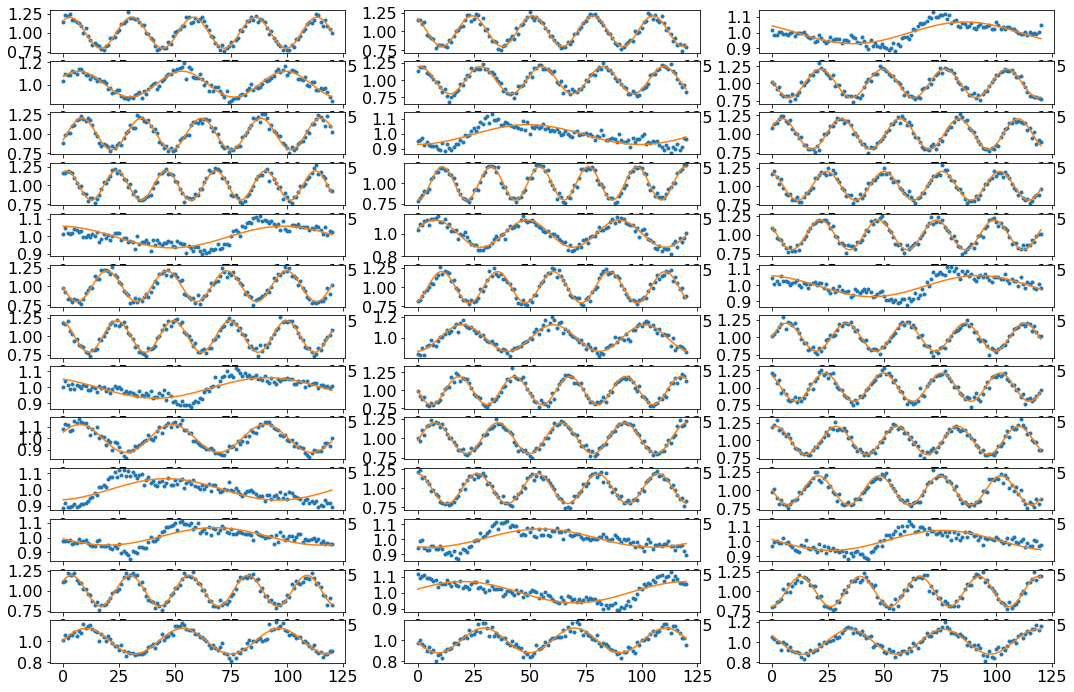

In [251]:
import glob # this package lets you search for filenames

fnames = glob.glob(ddir+'*.csv')

freqs = np.linspace(1/100,0.49,10000) # frequency grid shouldn't go higher than Nyquist limit
periods = [] # start an empty list to hold the period 

fig, axes = plt.subplots(13,3,figsize=(18,12))
# for fname, ax in zip(fnames[:12], axes.ravel()): # you can loop over two things
for fname, ax in zip(fnames, axes.ravel()): # you can loop over two things
    data = pd.read_csv(fname) # load in CSV data as a Pandas object

    time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables

    LS = LombScargle(time,flux) # initialize a Lomb-Scargle
    power = LS.power(freqs) # calculate LS power 
    bestfreq = freqs[np.argmax(power)] # which frequency has the highest Lomb-Scargle power?
    
    pred = LS.model(time,bestfreq) # make a sine wave prediction at the best frequency
    ax.plot(time,flux,'.')
    ax.plot(time,pred) # plot the model over the data
    
    periods.append(1/bestfreq) # add each period to the list
    
periods = np.array(periods) # turn it from a list to an array

freqs = np.linspace(1/100,0.45,10000) # frequency grid shouldn't go higher than Nyquist limit
periods = [] # start an empty list to hold the period 
names = []

for fname in tqdm(fnames): # tqdm is a package that gives you a progress bar - neat! 
    data = pd.read_csv(fname) # load in CSV data as a Pandas object

    time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables
#nterms will make sawtooth diagrams actually mroe accurate, talk about sine waves vs sawtooths etc
#nterms=5 look up actual sintax, put it after flux ie (time, flux, nterms=n)
#increases fourier
    LS = LombScargle(time,flux) # initialize a Lomb-Scargle
    power = LS.power(freqs) # calculate LS power 
    bestfreq = freqs[np.argmax(power)] # which frequency has the highest Lomb-Scargle power?
    
    pred = LS.model(time,bestfreq) # make a sine wave prediction at the best frequency
    
    periods.append(1/bestfreq) # add each period to the list
    names.append(os.path.basename(fname).strip('.csv')) # os.path.basename gets rid of directories and gives you the filename; then we strip '.csv'
    
periods = np.array(periods) # turn it from a list to an array

In [252]:
import glob # this package lets you search for filenames
import os

variables = pd.DataFrame({'Name':names,
              'Period':periods}) # you can turn a dictionary into a dataframe like this
#variables.Name = variables.Name.astype('|S') # have to do this so that it knows the names are strings
variables.Name = variables.Name.astype('string')

all_star_files = glob.glob(ddir_stars+'*/Star_Data.csv')

all_stars = pd.concat([pd.read_csv(table) for table in all_star_files]) # we are concatenating a list of dataframes; 
#we generate this list with a "list comprehension", a loop you write inside a list bracket 

#all_stars.Name = all_stars.Name.astype('|S') # have to do this so that it knows the names are strings
all_stars.Name = all_stars.Name.astype('string')
all_stars = all_stars[all_stars.Parallax > 0.01] # 10 mas parallax cut
print(len(all_stars),'stars above 10 mas parallax') # check how many stars there are total with good parallax

variables = pd.merge(all_stars,variables,on='Name') # merge these two arrays according to the keyword 'name'
print('Of which',len(variables),'variables') # cut down to a small list

m0, m1, m2 = np.log10(all_stars['BlueF']), np.log10(all_stars['GreenF']), np.log10(all_stars['RedF']) 
colour = m2-m0
abs_mag = m1 + 2*np.log10(1./all_stars.Parallax) 

v0, v1, v2 = np.log10(variables['BlueF']), np.log10(variables['GreenF']), np.log10(variables['RedF']) 
variable_colour = v2-v0
abs_mag_v = v1 + 2*np.log10(1./variables.Parallax)




889 stars above 10 mas parallax
Of which 39 variables


Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

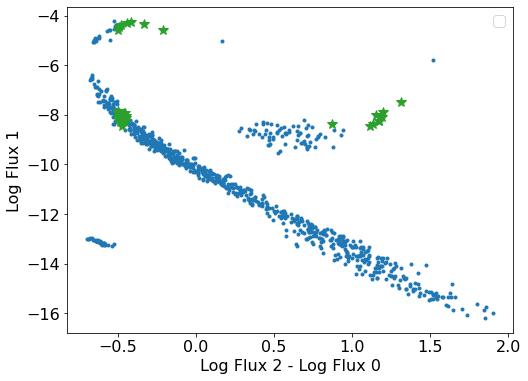

In [254]:
import numpy as np # for maths 
import matplotlib as mpl # for plotting 
import matplotlib.pyplot as plt

from tqdm import tqdm # tqdm is a package that lets you make progress bars to see how a loop is going

import os 

# configure notebook for plotting
%matplotlib inline

# subsequent lines default plot settings
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['figure.figsize']=(8.0,6.0)   
mpl.rcParams['font.size']=16              
mpl.rcParams['savefig.dpi']= 300             

import warnings
warnings.filterwarnings('ignore')

s = plt.plot(colour,abs_mag,'.C0')
h = plt.plot(variable_colour,abs_mag_v,'.C2',marker='*',markersize=10)

    
plt.legend([s, h],['Steady','Variable'])
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

Text(0.5, 1.0, 'all variables')

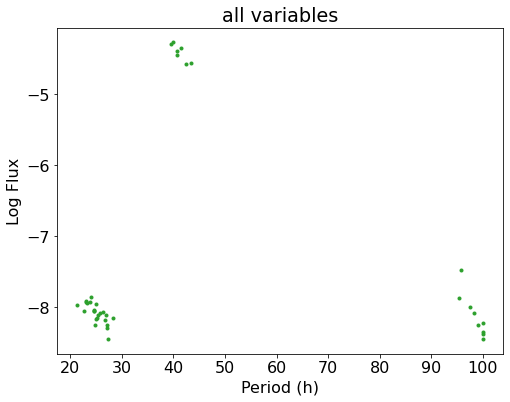

In [255]:
plt.plot(variables.Period,abs_mag_v,'.',color='C2')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');
plt.title('all variables')

(23,)
(23,)
True parameters: 12, -5. Recovered parameters: -0.06, -6.64


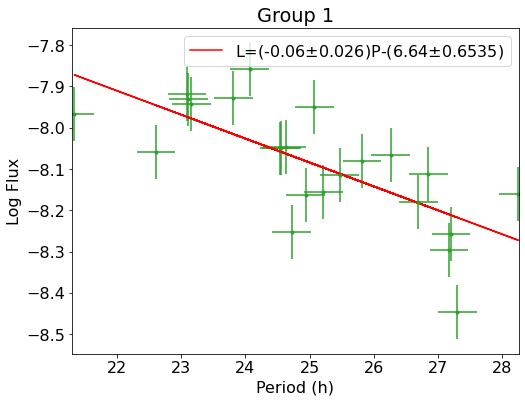

In [256]:
varp1=variables.Period[(variables.Period<35)]
mag1=abs_mag_v[(variables.Period<35)]

print(np.shape(varp1))
print(np.shape(mag1))
varp1err=np.ones_like(varp1)*0.3
mag1err=((10*mag1)*0.015)/(2.3*mag1)

# plt.plot(varp1,mag1,'.',color='C2')
plt.errorbar(varp1,mag1, xerr=varp1err, yerr=mag1err, fmt='.',color='C2')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');
plt.title ('Group 1')

A = np.vander(varp1,2) # the Vandermonde matrix of order N is the matrix of polynomials of an input vector 1, x, x**2, etc

b, residuals, rank, s = np.linalg.lstsq(A,mag1)
print('True parameters: 12, -5. Recovered parameters: %.2f, %.2f' % (b[0],b[1]))

reconstructed = A @ b # @ is shorthand for matrix multiplication in python

# plt.plot(varp1,mag1,'.',label='Data')
p= (99.561884, (-16.44551083999618) )
#plt.scatter(*p,color='C2',marker='X')
plt.plot(varp1,reconstructed,'-r',label=r'L=(-0.06$\pm$0.026)P-(6.64$\pm$0.6535)')
plt.xlim(21.3, 28.26)
#plt.plot(x,12*x-5,'-k',label='True')
#plt.legend()

True parameters: 12, -5. Recovered parameters: -0.08, -1.17


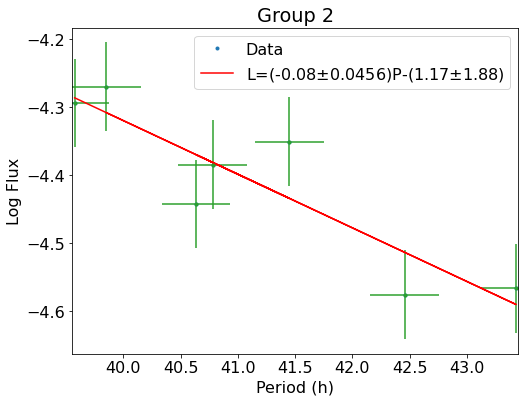

In [257]:
varp2=variables.Period[(abs_mag_v>-5)]
mag2=abs_mag_v[(abs_mag_v>-5)]

varp2err=np.ones_like(varp2)*0.3
mag2err=((10*mag2)*0.015)/(2.3*mag2)

# plt.plot(varp2,mag2,'.',color='C2')
plt.errorbar(varp2,mag2, xerr=varp2err, yerr=mag2err, fmt='.',color='C2')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');
plt.title('Group 2')
A = np.vander(varp2,2) # the Vandermonde matrix of order N is the matrix of polynomials of an input vector 1, x, x**2, etc

b, residuals, rank, s = np.linalg.lstsq(A,mag2)
print('True parameters: 12, -5. Recovered parameters: %.2f, %.2f' % (b[0],b[1]))

reconstructed = A @ b # @ is shorthand for matrix multiplication in python

p = (41.831569, -13.232844133917819+8.77)
plt.plot(varp2,mag2,'.',label='Data')
plt.plot(varp2,reconstructed,'-r',label=r'L=(-0.08$\pm$0.0456)P-(1.17$\pm$1.88)')
plt.xlim(39.55,43.45)
#plt.scatter(*p,color='C2',marker='X')
#plt.plot(x,12*x-5,'-k',label='True')
plt.legend()

True parameters: 12, -5. Recovered parameters: -0.15, 6.58


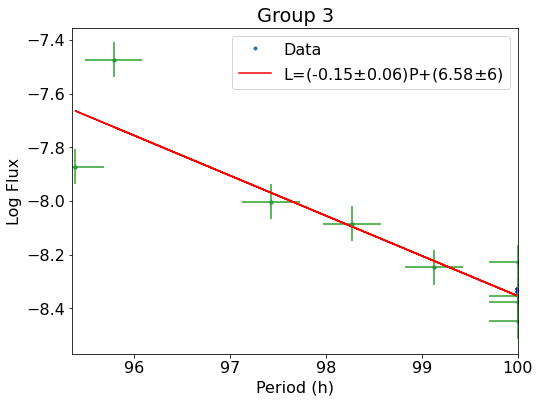

In [258]:
varp3=variables.Period[(variables.Period>85)]
mag3=abs_mag_v[(variables.Period>85)]

varp3err=0.3*np.array([1,1,1,1,1,1,1,1,1])
mag3err=((10*mag3)*0.015)/(2.3*mag3)

plt.errorbar(varp3,mag3, xerr=varp3err, yerr=mag3err, fmt='.',color='C2')
#'.',color='C2'
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');
plt.title('Group 3')
A = np.vander(varp3,2) # the Vandermonde matrix of order N is the matrix of polynomials of an input vector 1, x, x**2, etc

b, residuals, rank, s = np.linalg.lstsq(A,mag3)
print('True parameters: 12, -5. Recovered parameters: %.2f, %.2f' % (b[0],b[1]))

reconstructed = A @ b # @ is shorthand for matrix multiplication in python

p = (100 , -17.031050319018657+8.7)
plt.plot(varp3,mag3,'.',label='Data')
plt.plot(varp3,reconstructed,'-r',label=r'L=(-0.15$\pm$0.06)P+(6.58$\pm$6)')
plt.scatter(*p,color='blue',marker='X')
plt.xlim(95.35,100.01)
# plt.plot(x,12*x-5,'-k',label='True')
plt.legend()

In [259]:
# print(mag1)
10**(8.7/2)
mag3err
10**()

TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'tuple'

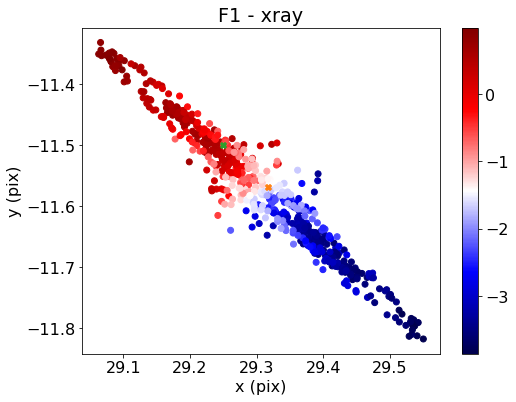

In [260]:
#for the front stars
centre = (29.31678674, -11.56881882)
Pf1 = (29.25, -11.5)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galf1 = frontstars[d<1] # filter to only close ones
plt.scatter(galf1.X,galf1.Y,c=galf1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C1',marker='X') # * expands the elements of a list 
plt.scatter(*Pf1,color='C2',marker='X') #green 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('F1 - xray');
# this shows us the burst is definetly in this galaxy and therefore we can use its standard candles

In [261]:
variables = pd.DataFrame({'Name':names,'Period':periods})

In [262]:
# find the variables in F1 and retrieve the relevent period & luminosity for this 
vgalf1=pd.merge(galf1,variables,on='Name')
vgalf1.head()
#star FrontS041587  period  99.561884   lum  -16.44551083999618 rv -1.03
#np.log10(3.585000e-17)
#radial velocity 0.27
## this period puts us in the range of the first graph so i will add this here and record the shift
## shift = 11.55  ((this is less accurate because we dont have variables with good parallax at this period))

,Name,X,Y,BlueF,GreenF,RedF,Parallax,RadialVelocity,Variable?,Period
0,FrontS041567,29.2467,-11.5136,2.351000e-19,2.730000e-19,2.692000e-19,-0.000,0.27,1,6.116681
1,FrontS041587,29.2863,-11.5768,1.448000e-17,3.585000e-17,1.715000e-16,0.001,-1.03,1,99.561884
2,FrontS041689,29.2873,-11.5373,3.022000e-20,4.039000e-20,5.261000e-20,-0.000,-0.32,1,7.843645
3,FrontS041753,29.3615,-11.5405,1.679000e-13,1.520000e-13,8.929000e-14,-0.000,-1.70,1,44.104803
4,FrontS041791,29.2617,-11.5970,5.582000e-17,4.462000e-17,2.007000e-17,0.001,-1.12,1,26.602283


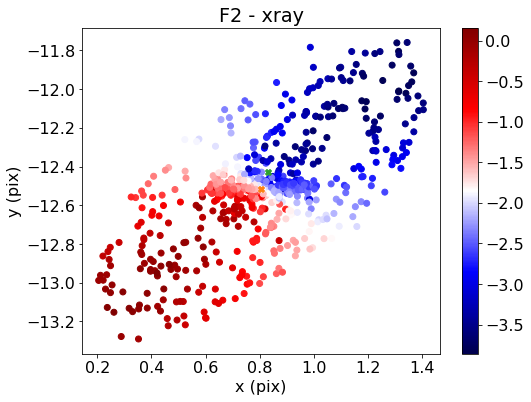

In [263]:
centre = ( 0.80429641, -12.51456459)
Pf2 = (0.83, -12.43)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galf2 = frontstars[d<1] # filter to only close ones
plt.scatter(galf2.X,galf2.Y,c=galf2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C1',marker='X') # * expands the elements of a list 
plt.scatter(*Pf2,color='C2',marker='X') #green is x-ray
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('F2 - xray');

In [264]:
vgalf2=pd.merge(galf2,variables,on='Name')
vgalf2.head()
# FrontS161130  period 100  rv -0.44 flux -15.0619809025237
np.log10(8.670000e-16)

-15.06198090252379

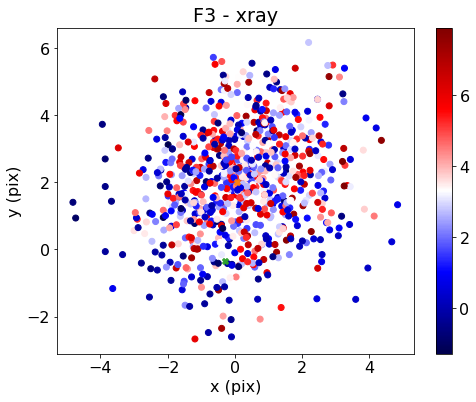

In [265]:
centre = ( 0.06017968,   2.00958835)
Pf3 = (-0.3 ,  -0.34)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galf3 = frontstars[d<5] # filter to only close ones
plt.scatter(galf3.X,galf3.Y,c=galf3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C1',marker='X') # * expands the elements of a list 
plt.scatter(*Pf3,color='C2',marker='X') #green is x-ray
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('F3 - xray');

In [266]:
vgalf3=pd.merge(galf3,variables,on='Name')
vgalf3.head()

#choose 0th star FrontS167359 (0.2113,2.1105), period = 97.248    flux = -14.454198242840723
#np.log10(3.514000e-15)

,Name,X,Y,BlueF,GreenF,RedF,Parallax,RadialVelocity,Variable?,Period
0,FrontS167359,0.2113,2.1105,1.408000e-15,3.514000e-15,1.743000e-14,0.000,2.63,1,97.427653
1,FrontS167368,-0.0327,2.0783,2.901000e-11,2.286000e-11,1.003000e-11,0.002,4.30,1,40.417964
2,FrontS167378,0.2280,1.9260,1.894000e-11,1.419000e-11,5.853000e-12,0.001,2.75,1,41.224490
3,FrontS167390,0.0758,2.0604,1.957000e-14,6.258000e-14,5.161000e-13,0.001,4.19,1,94.588970
4,FrontS167407,0.2475,2.1244,2.616000e-11,2.035000e-11,8.879000e-12,0.001,4.58,1,40.780619


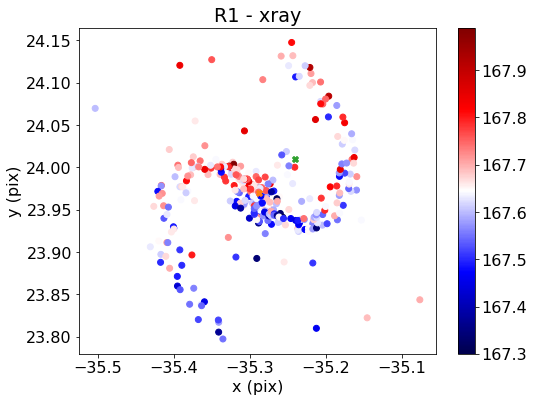

In [267]:
#Right stars 
centre = ( -35.28781879,  23.969715)
Pr1 = (-35.24,  24.01)
d = np.sqrt((rightstars.X-centre[0])** 2 + (rightstars.Y - centre[1])**2)
galr1 = rightstars[d<1.2] # filter to only close ones
plt.scatter(galr1.X,galr1.Y,c=galr1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C1',marker='X') # * expands the elements of a list 
plt.scatter(*Pr1,color='C2',marker='X') #green is x-ray
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('R1 - xray');

In [268]:
vgalr1=pd.merge(galr1,variables,on='Name')
vgalr1.head()
#RightS112798  period 100  rv 167.66  flux -17.406492410668235
np.log10(3.922000e-18)

-17.406492410668235

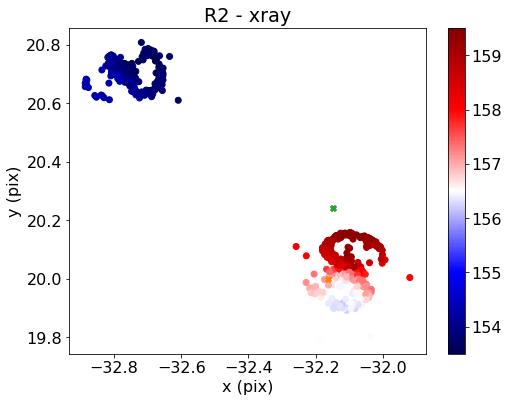

In [269]:
centre = ( -32.16457647,  20)
Pr2 = (-32.15,  20.24)
d = np.sqrt((rightstars.X-centre[0])** 2 + (rightstars.Y - centre[1])**2)
galr2 = rightstars[d<1
                  ] # filter to only close ones
plt.scatter(galr2.X,galr2.Y,c=galr2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C1',marker='X') # * expands the elements of a list 
plt.scatter(*Pr2,color='C2',marker='X') #green is x-ray
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('R2 - xray');
##not in any galaxy, only close 

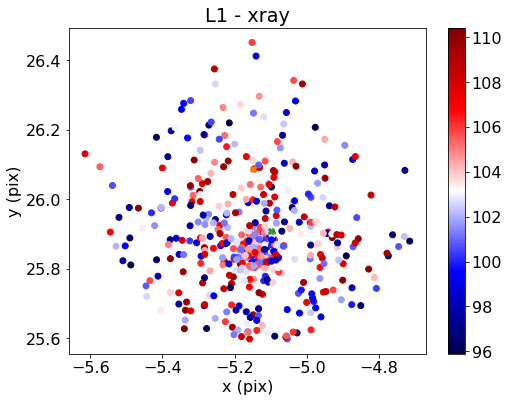

In [270]:
centre = (-5.15, 26.0864850)
Pl1 = (-5.1 ,  25.91)
d = np.sqrt((leftstars.X-centre[0])** 2 + (leftstars.Y - centre[1])**2)
gall1 = leftstars[d<0.5] # filter to only close ones
plt.scatter(gall1.X,gall1.Y,c=gall1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C1',marker='X') # * expands the elements of a list 
plt.scatter(*Pl1,color='C2',marker='X') #green is x-ray
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('L1 - xray');

In [271]:
vgall1=pd.merge(gall1,variables,on='Name')
vgall1.head()
#LeftS084435 period 99.561884 rv 105.49. flux. -17.263842624726866
np.log10(5.447000e-18)

-17.263842624726866

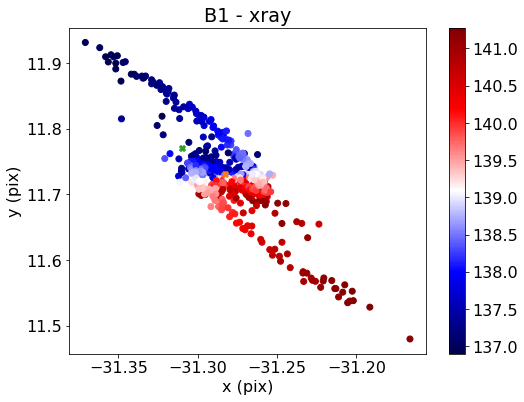

In [272]:
centre = (-31.28251018,  11.73160519)
Pb1 = (-31.31,  11.77)
d = np.sqrt((bottomstars.X-centre[0])** 2 + (bottomstars.Y - centre[1])**2)
galb1 = bottomstars[d<1] # filter to only close ones
plt.scatter(galb1.X,galb1.Y,c=galb1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C1',marker='X') # * expands the elements of a list 
plt.scatter(*Pb1,color='C2',marker='X') #green is x-ray
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('B1 - xray');

In [273]:
vgalb1=pd.merge(galb1,variables,on='Name')
vgalb1.head()
#choose 0th star BottomS003280  period = 100.000000 flux = -17.209926051573696 rv 137.44
#np.log10(6.167000e-18)

,Name,X,Y,BlueF,GreenF,RedF,Parallax,RadialVelocity,Variable?,Period
0,BottomS003280,-31.2902,11.7458,2.749000e-18,6.167000e-18,2.293000e-17,-0.0,137.44,1,100.000000
1,BottomS003449,-31.2827,11.7171,3.714000e-14,3.255000e-14,1.762000e-14,0.0,140.29,1,44.363104
2,BottomS003558,-31.2905,11.7088,6.141000e-14,5.235000e-14,2.739000e-14,0.0,139.36,1,41.754708
3,BottomS003648,-31.2950,11.7658,4.230000e-18,8.316000e-18,2.403000e-17,0.0,137.04,1,100.000000
4,BottomS003693,-31.2699,11.7158,6.368000e-18,1.526000e-17,6.807000e-17,-0.0,140.11,1,100.000000


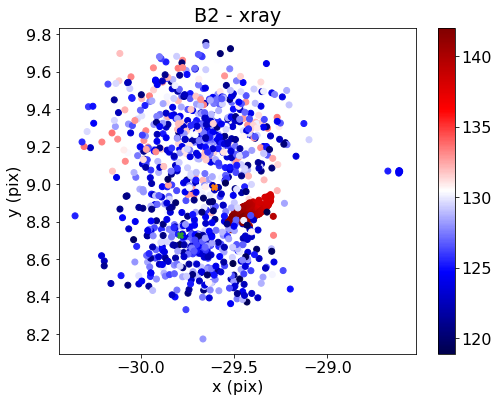

In [274]:
centre = (-29.60634515,   8.98371267)
Pb2 = (-29.79,   8.73)
d = np.sqrt((bottomstars.X-centre[0])** 2 + (bottomstars.Y - centre[1])**2)
galb2 = bottomstars[d<1] # filter to only close ones
plt.scatter(galb2.X,galb2.Y,c=galb2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C1',marker='X') # * expands the elements of a list 
plt.scatter(*Pb2,color='C2',marker='X') #green is x-ray
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('B2 - xray');

In [275]:
vgalb2=pd.merge(galb2,variables,on='Name')
vgalb2.head()
np.log10(2.357000e-17)
# BottomS000063 (, period = 100, rv 126.36 flux -16.627640417475675

-16.627640417475675

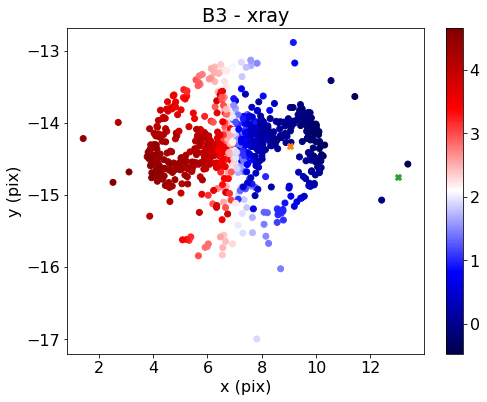

In [276]:
centre = (9.04636477, -14.32011399)
Pb3 = (13.02, -14.75)
d = np.sqrt((bottomstars.X-centre[0])** 2 + (bottomstars.Y - centre[1])**2)
galb3 = bottomstars[d<10] # filter to only close ones
plt.scatter(galb3.X,galb3.Y,c=galb3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C1',marker='X') # * expands the elements of a list 
plt.scatter(*Pb3,color='C2',marker='X') #green is x-ray
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('B3 - xray');
#could be in outer of B3

In [277]:
#i think i just want the green flux
vgalb3=pd.merge(galb3,variables,on='Name')
vgalb3.head()
#choose 0th star BottomS166486  period = 100.000000, flux = -13.912573542963715 rv 3.41
#np.log10(1.223000e-14)

,Name,X,Y,BlueF,GreenF,RedF,Parallax,RadialVelocity,Variable?,Period
0,BottomS166486,6.8384,-14.3700,5.422000e-15,1.223000e-14,4.848000e-14,0.002,3.41,1,100.000000
1,BottomS166528,6.0405,-14.3274,3.148000e-15,7.152000e-15,2.764000e-14,0.001,3.82,1,100.000000
2,BottomS166631,6.9762,-14.2283,5.848000e-11,5.410000e-11,3.384000e-11,0.000,1.46,1,42.616034
3,BottomS166639,1.4247,-14.2192,3.192000e-15,6.805000e-15,2.367000e-14,0.001,4.49,1,100.000000
4,BottomS166797,6.2263,-14.9390,2.019000e-14,1.527000e-14,6.538000e-15,0.001,3.65,1,25.048223


In [278]:
# #LIST OF POSSIBLE STARS 
# #f1   period.  99.561884.  lum.  -16.44551083999618. rv =-1.03 shift 8.16
# f2 FrontS161130  period 100  rv -0.44 flux -15.0619809025237 shift 6.72
# f3 FrontS167359 period = 97.248  flux = -14.454198242840723 rv 2.63 shift 6.51
# r1 #RightS112798  period 100  rv 167.66  flux -17.406492410668235 shift 9.05
# l1 #LeftS084435 period 99.561884 rv 105.49. flux. -17.263842624726866 shift 8.97
# b1  BottomS003280  period = 100.000000 flux = -17.209926051573696 rv 137.44 shift 8.86
# b2 BottomS000063 period = 100,  rv 126.36 flux -16.627640417475675 shift 8.27
# b3 BottomS166486  period = 100.000000, flux = -13.912573542963715 rv 3.41 shift 5.56

In [279]:
#RECORD DISTANCES AS X AND R_V AS Y
#f1 12022.644346174131  -1.03 photon count 356631
phF1 = 356631
p1 = 356631
d1 = 12022.644346174131 *10**(-6)
#f2 2290.8676527677726  -0.44 photon 4131037
phF2 = 4131037
p2 = 4131037
d2 = 2290.8676527677726 *10**(-6)
#f3 1798.8709151287874  2.63
phF3 = 21111058
p3 =21111058
d3 = 1798.8709151287874 *10**(-6)
# r1 33496.54391578279  167.66
phR1 = 71496
p4 = 71496
d4 = 33496.54391578279 *10**(-6)
# l1 30549.211132155153  105.49
phL1 = 64556
p5 = 64556
d5 = 30549.211132155153 *10**(-6)
# b1  26915.348039269138  137.44
phB1 = 69549
p6 = 69549 
d6 = 26915.348039269138 *10**(-6)
# b2 13645.831365889238  126.36
phB2 = 80368
p7 = 80368
d7 = 13645.831365889238 *10**(-6)
# b3  602.5595860743575  3.41
phB3 = 1906

In [280]:
# a=5.56

# 10**(a/2)
phclose = np.array([phF1, phF2, phF3, phR1, phL1, phB1, phB2])


In [281]:
#plot photon count vs distance 
#define our current array of distances in pc
aaa=np.array([12022.644346174131, 2290.8676527677726, 1798.8709151287874, 33496.54391578279, 30549.211132155153, 26915.348039269138, 13645.831365889238 ])
#make an array of photon count for each

In [282]:
# len(aaa)

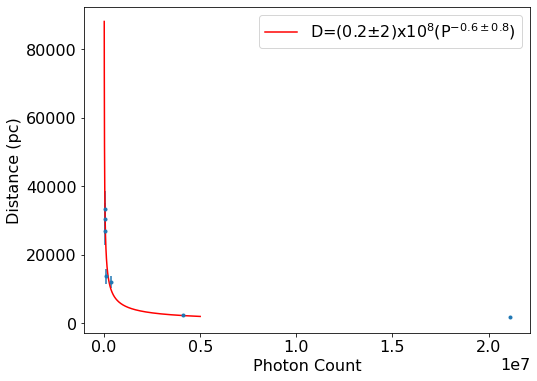

In [283]:
#as expected follow inverse square law
#coefficients from regression of form a*(x**b) (r^2 = 0.9996) where c1=a and c2=b
c1= 2.448*(10**7) #\pm 2.2225e7
c2 = -0.6109 #\pm 0.8
phot=np.linspace(5*(10**6), 10000, 1*(10**8))

def dist(phot):
    return c1*np.power(phot,c2)

dist(phot)

phcloseerr=np.sqrt(phclose)
aaaerr=0.15*aaa


plt.errorbar(phclose, aaa, xerr=phcloseerr, yerr=aaaerr, fmt='.')
# plt.scatter (phclose, aaa)
plt.plot(phot, dist(phot), color='r',label=r'D=(0.2$\pm$2)x$10^8$(P$^{-0.6\pm0.8})$')
plt.legend(loc='best')
# plt.title('Relation between Distance and Photon Count X-ray Burst')
plt.xlabel('Photon Count')
plt.ylabel('Distance (pc)')
plt.show()


In [166]:
print(phcloseerr)

[ 597.1859007  2032.49526445 4594.67713773  267.38735946  254.07872796
  263.72144395  283.49250431]


In [167]:
p8 = 6140
d8 = 118746.10017110563 *10**(-6)
r8 = 365
p9 = 332
d9 = 705745.5657736808 *10**(-6)
r9= 1524
p10 = 479
d10 = 564149.8127493259 *10**(-6)
r10= 1435 
p11=543
d11=522543.19646320463 *10**(-6)
r11=1253
p12= 327
d12= 712318.4468434978 *10**(-6)
r12=1565
p13= 331
d13= 707047.3389195482 *10**(-6)
r13=1555 
p14 = 388
d14 = 641643.9627178446 *10**(-6)
r14= 1508 
p15 = 2320
d15 = 215196.3017504021 *10**(-6)
r15=504
p16 = 372
d16 = 658364.9949139267 *10**(-6)
r16=1430
p17 = 460 
d17 = 578272.6522826592 *10**(-6)
r17=1324 
d18 = dist(354) *10**(-6)
r18= 1565

d19 = dist(506) *10**(-6)
r19=1236

d20 = dist(1295) *10**(-6)
r20= 814

d21 = dist(2212) *10**(-6)
r21= 602

d22 = dist(1923) *10**(-6)
r22= 665

d23 = dist(369) *10**(-6)
r23 = 1474

d24 = dist(471) *10**(-6)
r24= 1343

d25 = dist(441) *10**(-6)
r25 = 1380

d26 = dist(983) *10**(-6)
r26 = 892

d27 = dist(899) *10**(-6)
r27 = 1019

d28 = dist(544) *10**(-6)
r28 = 1232

d29 = dist(1307) *10**(-6)
r29 = 821

d30 = dist(2522) *10**(-6)
r30 = 589

d31 = dist(695) *10**(-6)
r31 =1113

d32 = dist(400)  *10**(-6)
r32 = 1422

d33 = dist(1898) *10**(-6)
r33= 666

d34 = dist(1520) *10**(-6)
r34 = 743

d35 = dist(516) *10**(-6)
r35 = 1338

d36 = dist(1163) *10**(-6)
r36 = 866


In [168]:
aaa=np.array([12022.644346174131, 2290.8676527677726, 1798.8709151287874, 33496.54391578279, 30549.211132155153, 26915.348039269138, 13645.831365889238, 602.5595860743575 ])
aa=aaa*10**(-6)

In [169]:
bb=np.array([-1.03, -0.44, 2.63, 167.66, 105.49, 137.44, 126.36, 3.41])
r1 = -1.03
r2 = -0.44
r3 = 2.63
r4 = 167.66
r5 = 105.49
r6 = 137.44
r7 = 126.36

In [170]:
d = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20, d21, d22, d23, d24, d25, d26, d27, d28, d29, d30, d31, d32, d33, d34, d35, d36]
r = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15, r16, r17, r18, r19, r20, r21, r22, r23, r24, r25, r26, r27, r28, r29, r30, r31, r32, r33, r34, r35, r36]
#dd = d*10**(-6)



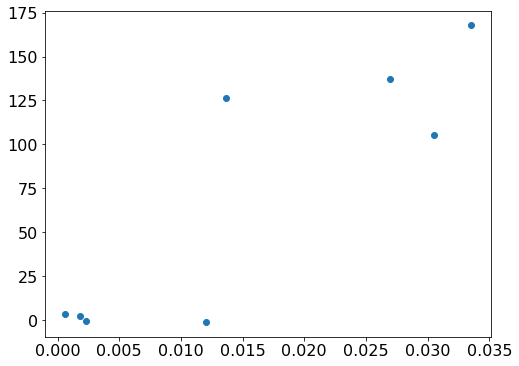

In [171]:
plt.scatter(aa, bb)

 Recovered parameters: 4723.43022, -3.94


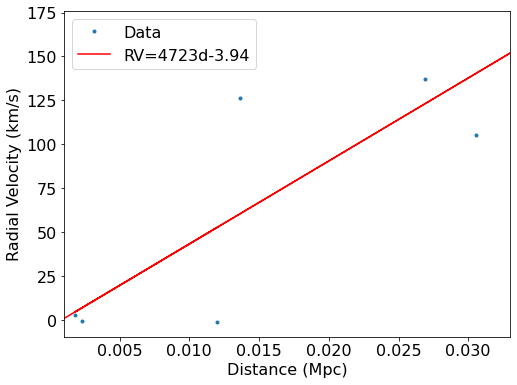

In [172]:
A = np.vander(aa,2) # the Vandermonde matrix of order N is the matrix of polynomials of an input vector 1, x, x**2, etc

b, residuals, rank, s = np.linalg.lstsq(A,bb)
print(' Recovered parameters: %.5f, %.2f' % (b[0],b[1]))

reconstructed = A @ b # @ is shorthand for matrix multiplication in python

plt.plot(aa,bb,'.',label='Data')
plt.plot(aa,reconstructed,'-r',label='RV=4723d-3.94')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Radial Velocity (km/s)')
plt.xlim([0.001,0.033])
#plt.plot(x,12*x-5,'-k',label='True')
plt.legend()
#plot in Mpc or kpc for slope for H_0

In [173]:
h0time=4723/3.08e19

In [174]:
(1/h0time)/3.15e7
#2.06e8 years old
np.shape(d)

(36,)

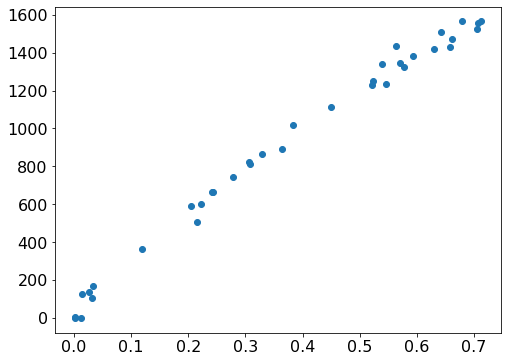

In [175]:
plt.scatter(d, r)

 Recovered parameters: 2173.79673, 88.65


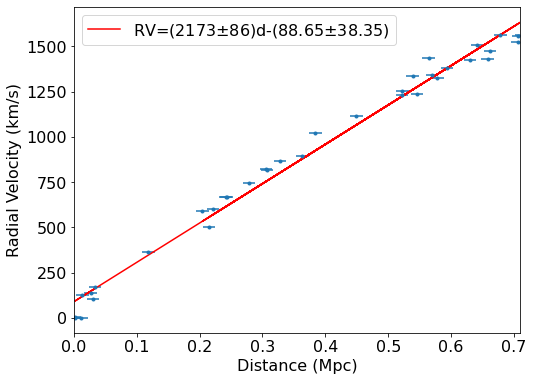

In [186]:
A = np.vander(d,2) # the Vandermonde matrix of order N is the matrix of polynomials of an input vector 1, x, x**2, etc

b, residuals, rank, s = np.linalg.lstsq(A,r)
print(' Recovered parameters: %.5f, %.2f' % (b[0],b[1]))

reconstructed = A @ b # @ is shorthand for matrix multiplication in python

#derr comes from uncertainty in other plot
rerr=0.1*np.ones_like(r)
derr=0.01*np.ones_like(d)

# plt.plot(d,r,'.',label='Data')
plt.errorbar(d, r, xerr=derr, yerr=rerr, fmt='.')
plt.plot(d,reconstructed,'-r',label=r'RV=(2173$\pm86)$d-(88.65$\pm$38.35)')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Radial Velocity (km/s)')
plt.xlim(0,0.71)
#plt.plot(x,12*x-5,'-k',label='True')
plt.legend()

#plt.errorbar, xerr= something like that

In [129]:
H0_t= 2173/3.08e19
(1/H0_t)/3.15e7
# 449966763 years = 449.9667 million years (i think) uncertainty is 1.7e7

449966763.8185816

In [130]:
print(H0_t)

7.055194805194806e-17


In [131]:
#distant galaxies dont contain individual star data so this is only resolved galaxies
#it looks like elliptical galaxies have more stars- maybe i should separate into elliptical and spiral
#we have notably more spiral than elliptiocal galaxies
s1 = 388
s2=805
s3 = 626
s4=804
s5=657
s6= 474
s7= 731
s8=704
s9= 678
s10=595
s11=560
s12=573
s13=430
s14=631
s15 = 711
s16 = 548
s17 = 670
s18 = 629
s19=403
s20=716

e1=922
e2 = 1000
e3= 793
e4= 442
e5=418
e6=568
e7=592
e8=554

In [132]:
stot=(s1+s2+s3+s4+s5+s6+s7+s8+s9+s10+s11+s12+s13+s14+s15+s16+s17+s18+s19+s20)/20
etot=(e1+e2+e3+e4+e5+e6+e7+e8)/8
print(stot)
print(etot)
tot=(stot+etot)/2
print(tot)

616.65
661.125
638.8875


In [192]:
#radii
#euclidian distance ie pythag
x1=-10.6
y1=-44.22
cent1=-10.4
cent2=-44.31
ed=np.sqrt((x1-cent1)**2 +(y1-cent2)**2)
print(ed, 'distance in degrees')

0.21931712199461384 distance in degrees


In [193]:
# ed=np.sqrt((x1-cent1)**2)
# print(ed, 'distance in degrees')

In [195]:
radius = 17782*np.tan(ed)
print('radius is', radius, 'in pc')

radius is 3963.652346094401 in pc


In [196]:
#im not sure if my values are correct
r1=5.6150753543112555e-05 #f3
r2= 2.350531854708629 #f4
r3=  0.0002324439193374876

In [ ]:
# thickness of of BA6 is 1474.8089382588266pc
#radius ofBA9 is 3963pc